In [ ]:
# wersja uproszczona, brak zapisu do s3

In [1]:
import pandas as pd
from pathlib import Path
from pycaret.regression import setup, finalize_model, compare_models

In [2]:
LOCAL_DATA = Path('data')

df = pd.read_csv(LOCAL_DATA / 'current' / 'final_cleaned.csv', sep=';')
df.sample(5)

,Miejsce,5_km_sec,finish_sec,age,gender
9246,1224.0,1413.0,6081,30,F
17802,9789.0,2314.0,9667,59,M
9269,1249.0,1460.0,6092,35,M
1564,1572.0,1461.0,6312,51,M
6056,6065.0,1824.0,8045,50,M


In [3]:
ESTIMATOR = "MAE"

exp = setup(
    data = df,
    target = 'finish_sec',
    categorical_features = ['gender'],
    ignore_features = ['Miejsce'],
    session_id = 132
    # verbose=False
)

,Description,Value
0,Session id,132
1,Target,finish_sec
2,Target type,Regression
3,Original data shape,"(18190, 5)"
4,Transformed data shape,"(18190, 4)"
5,Transformed train set shape,"(12733, 4)"
6,Transformed test set shape,"(5457, 4)"
7,Ignore features,1
8,Numeric features,2
9,Categorical features,1


In [4]:
exp.dataset_transformed.sample(10)

,5_km_sec,age,gender,finish_sec
16247,1782.0,62.0,1.0,8436
2156,1491.0,34.0,1.0,6547
4787,1667.0,43.0,0.0,7467
14764,1785.0,44.0,0.0,7828
16167,1951.0,61.0,1.0,8399
2229,1479.0,67.0,1.0,6570
4707,1692.0,44.0,0.0,7439
7641,2090.0,31.0,1.0,9389
14896,1855.0,45.0,1.0,7869
13335,1722.0,45.0,0.0,7362


In [5]:
best_models = exp.compare_models(sort=ESTIMATOR)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,289.8910,170530.6067,412.5852,0.8713,0.0574,0.0379,0.0130
gbr,Gradient Boosting Regressor,291.3836,159224.6050,398.8333,0.8797,0.0513,0.0384,0.0690
llar,Lasso Least Angle Regression,293.5436,167768.5252,409.2200,0.8733,0.0574,0.0387,0.0070
lasso,Lasso Regression,293.5436,167768.5252,409.2200,0.8733,0.0574,0.0387,0.1050
en,Elastic Net,293.5449,167770.8979,409.2228,0.8733,0.0574,0.0387,0.0070
br,Bayesian Ridge,293.5462,167772.2179,409.2245,0.8733,0.0574,0.0387,0.0080
ridge,Ridge Regression,293.5544,167804.6840,409.2637,0.8733,0.0574,0.0387,0.0070
lar,Least Angle Regression,293.5545,167804.7024,409.2637,0.8733,0.0574,0.0387,0.0070
lr,Linear Regression,293.5545,167804.7024,409.2637,0.8733,0.0574,0.0387,0.2790
omp,Orthogonal Matching Pursuit,293.8236,167929.2665,409.4212,0.8732,0.0575,0.0387,0.0070


In [6]:
# próba strojenia hiperparametrów

best_tuned_model = exp.tune_model(best_models, n_iter=5, optimize=ESTIMATOR)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,289.9388,172841.2782,415.7418,0.8685,0.0536,0.0379
1,281.5730,190111.3757,436.0176,0.8618,0.1643,0.0368
2,295.6509,178390.2456,422.3627,0.8709,0.0541,0.0386
3,293.1385,191940.2849,438.1099,0.8545,0.0527,0.0381
4,294.9099,178202.7899,422.1407,0.8656,0.0540,0.0382
5,280.5870,149818.1869,387.0635,0.8831,0.0498,0.0370
6,278.0909,150784.8132,388.3102,0.8812,0.0493,0.0364
7,289.3962,175666.2504,419.1256,0.8635,0.0524,0.0378
8,301.0997,175663.3800,419.1222,0.8697,0.0531,0.0391


Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [7]:
# strojenie hiperparametrow nie przynioslo rezultatow

best_model = compare_models([best_models, best_tuned_model])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,289.8910,170530.6067,412.5852,0.8713,0.0574,0.0379,0.0230
1,Huber Regressor,289.2026,172219.9652,414.6468,0.8700,0.0634,0.0377,0.0220


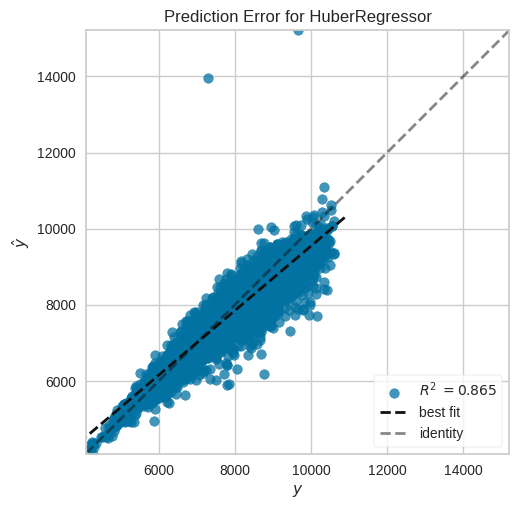

In [8]:
exp.plot_model(best_model, plot='error')

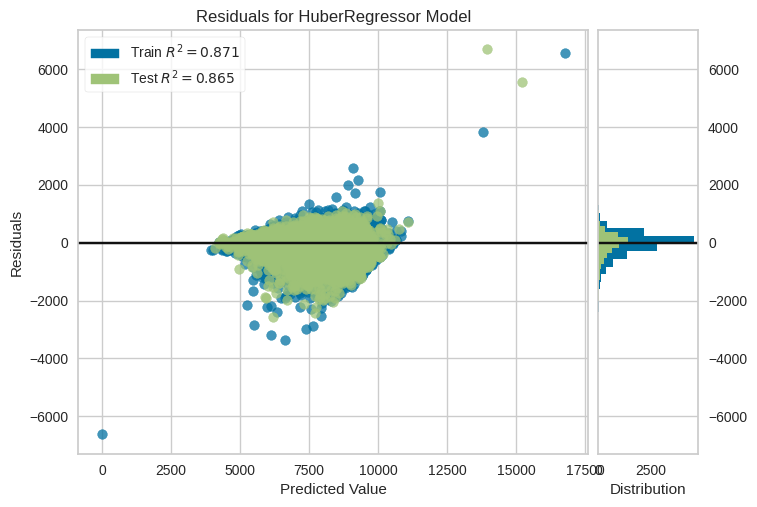

In [9]:
exp.plot_model(best_model, plot='residuals')

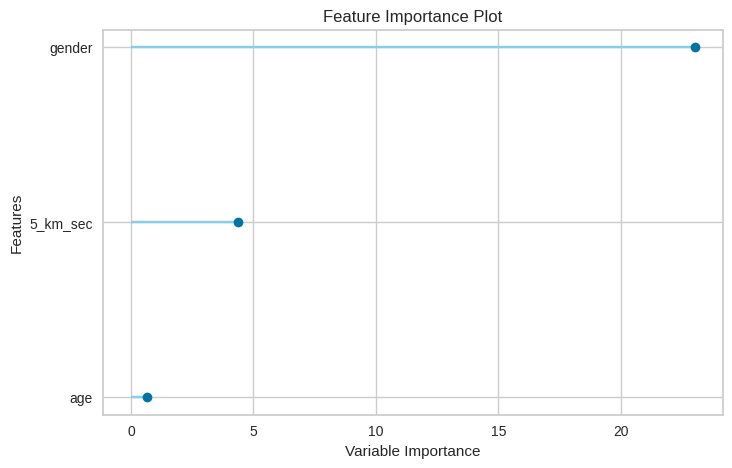

In [10]:
exp.plot_model(best_model, plot='feature')

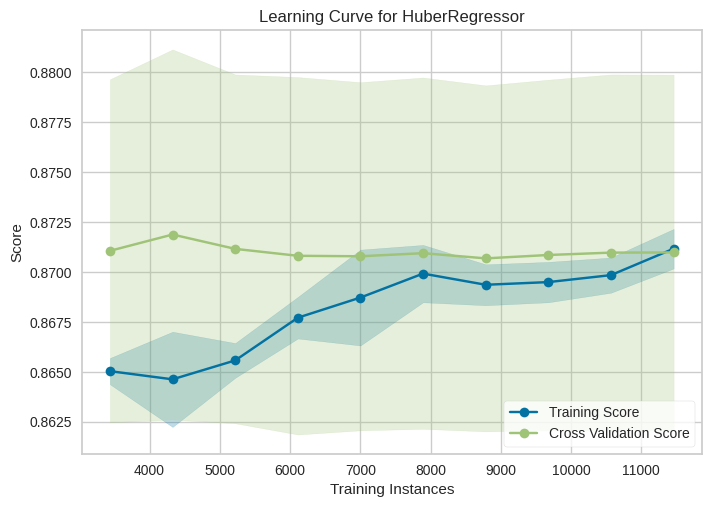

In [11]:
exp.plot_model(best_model, plot='learning')

In [12]:
exp.predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,296.0148,180075.0791,424.3525,0.8648,0.0528,0.0384


,5_km_sec,age,gender,finish_sec,prediction_label
16855,1876.0,37,M,8790,8215.786444
13348,1747.0,50,F,7367,7681.670027
532,1290.0,27,F,5669,5663.126164
8552,1336.0,38,M,5649,5848.932354
11160,1589.0,43,M,6796,6961.398176
...,...,...,...,...,...
14216,1772.0,32,M,7649,7756.576195
13392,1771.0,22,M,7378,7745.698673
9876,1453.0,35,M,6356,6359.943451
8781,1431.0,26,F,5834,6280.658286


In [14]:
final_model = finalize_model(best_model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['5_km_sec', 'age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['gender'],
                                    transformer=OrdinalEncoder(cols=['gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': F      0
M      1
NaN   -1
dtype: int64}]))),
                ('actual_estimator', HuberRegressor())])

In [16]:


exp.save_model(final_model, 'final_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['5_km_sec', 'age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['gender'],
                                     transformer=OrdinalEncoder(cols=['gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': F      0
 M      1
 NaN   -1
 dtype: int64}]))),
    